In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#load and preview
df = pd.read_csv('loan_data.csv')
print(df.info())
print(df.head())

#check for missing values
print(df.isnull().sum())

#drop missing values
df.dropna(inplace=True)

#convert purpose column using label encoding
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
   credit.policy             purpose  int.rate  installmen

In [20]:
#scale numerical features
scaler = StandardScaler()
scaled_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

#define features and target
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('done')

done


In [22]:
#logistic regression model fitting

#train model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
#random forest model fitting

#train model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
#logistic regression model predictions
y_pred_lr = lr_model.predict(X_test)

#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}')

[[2394   14]
 [ 451   15]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.03      0.06       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.79      0.84      0.77      2874

Logistic Regression Accuracy: 0.8382045929018789


In [28]:
#random forest model predictions

#confusion matrix and classification report
y_pred_rf = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')

[[2395   13]
 [ 457    9]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.41      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874

Random Forest Accuracy: 0.8364648573416841


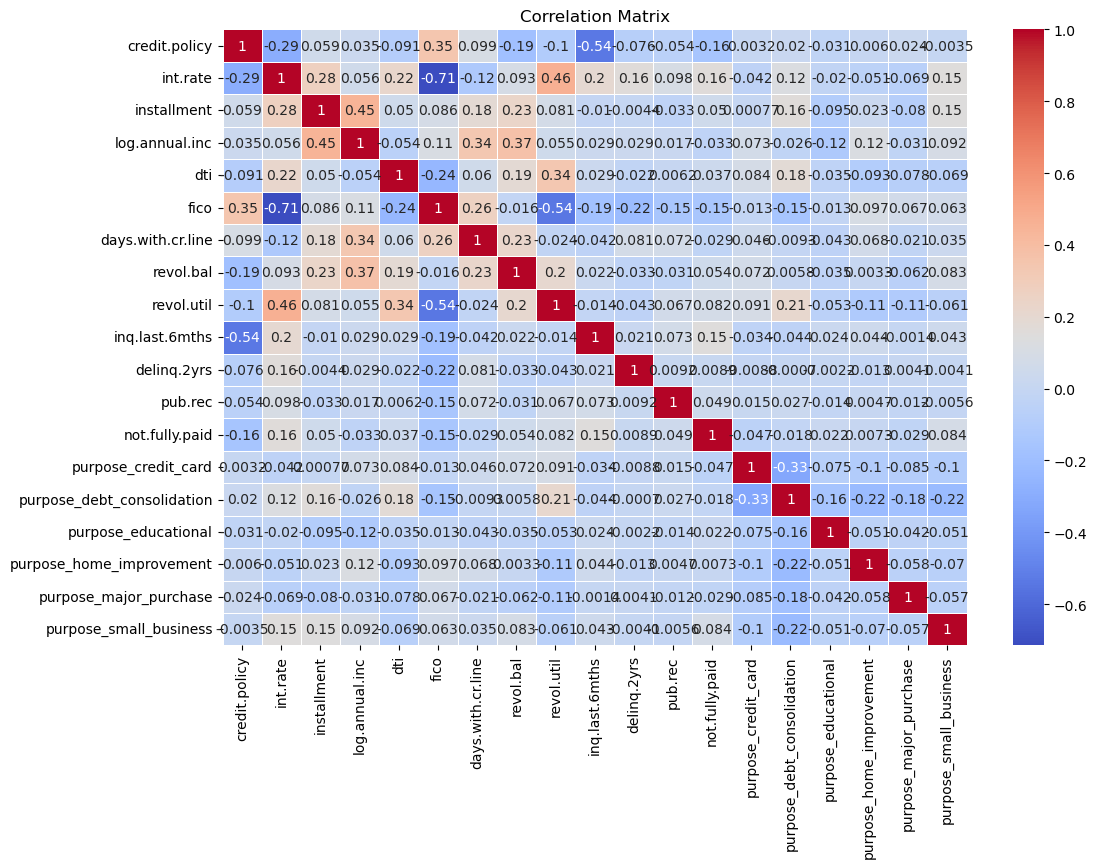

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

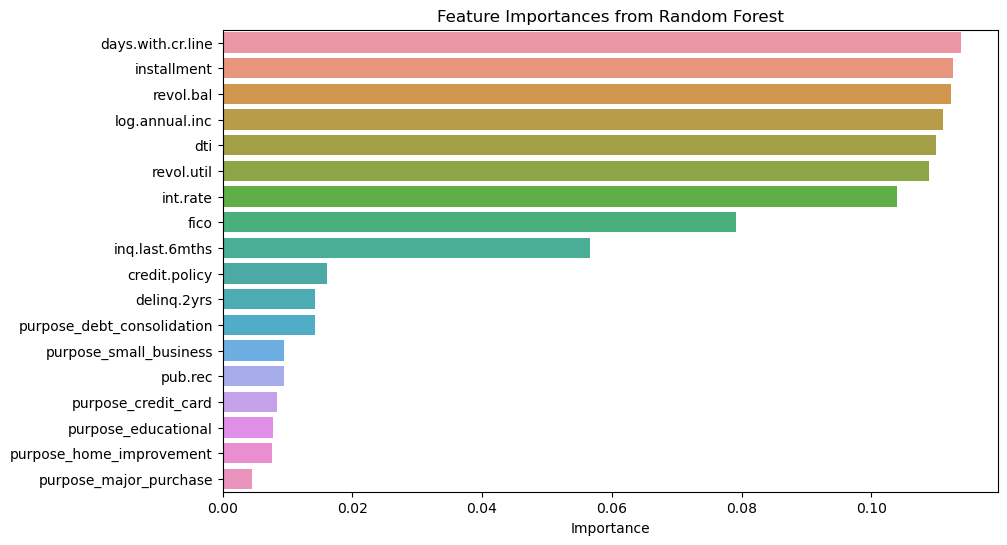

In [31]:
#plot feature importances for Random Forest
importances = rf_model.feature_importances_
features = X.columns

#create a DataFrame for the feature importances
feat_importances = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)

#plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances['Importance'], y=feat_importances.index)
plt.title('Feature Importances from Random Forest')
plt.show()

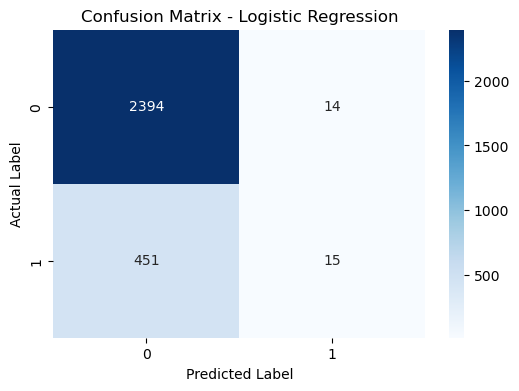

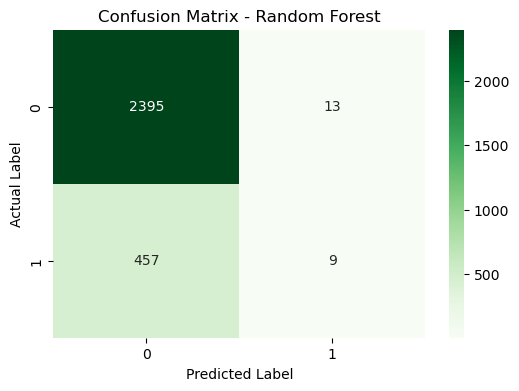

In [32]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

#logistic regression confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#random forest confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
